# Excessively More Charts Assignment
## DSC 640
## Weeks 9 and 10
## Data Presentation and Visualization Assignment Weeks 9 and 10
## David Berberena
## 8/10/2024

# Program Start

In [1]:
# To craft the necessary charts, I will need to import my datasets, which will be both datasets from the Exercise 6.2
# Datasets file folder. I have saved those files to my directory and will read them in here using Pandas, which will be 
# imported now along with Matplotlib and Seaborn, the libraries I have chosen to use to output all of the visualizations
# needed: a histogram, a box plot, a bullet chart, and another chart.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

education = pd.read_csv('education.csv')
crime = pd.read_csv('crimeratesbystate-formatted.csv')

print(education.head())
print(crime.head())

           state  reading  math  writing  percent_graduates_sat  \
0  United States      501   515      493                     46   
1        Alabama      557   552      549                      7   
2         Alaska      520   516      492                     46   
3        Arizona      516   521      497                     26   
4       Arkansas      572   572      556                      5   

   pupil_staff_ratio  dropout_rate  
0                7.9           4.4  
1                6.7           2.3  
2                7.9           7.3  
3               10.4           7.6  
4                6.8           4.6  
            state  murder  forcible_rape  robbery  aggravated_assault  \
0  United States      5.6           31.7    140.7               291.1   
1        Alabama      8.2           34.3    141.4               247.8   
2         Alaska      4.8           81.1     80.9               465.1   
3        Arizona      7.5           33.8    144.4               327.4   
4        A

## Visualization 1: Histogram

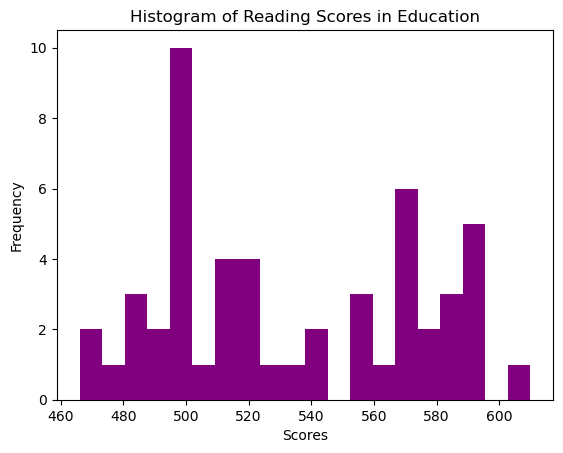

In [6]:
# To generate a histogram, the hist() function in Matplotlib can be used. I will plot the reading variable to see the 
# distribution of values. I have set the bins argument to 20 so that each score can be clearly noted as belonging within a 
# small range. 

plt.hist(education['reading'], bins = 20, color = 'purple')
plt.title('Histogram of Reading Scores in Education')
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.show()

## Visualization 2: Box Plot

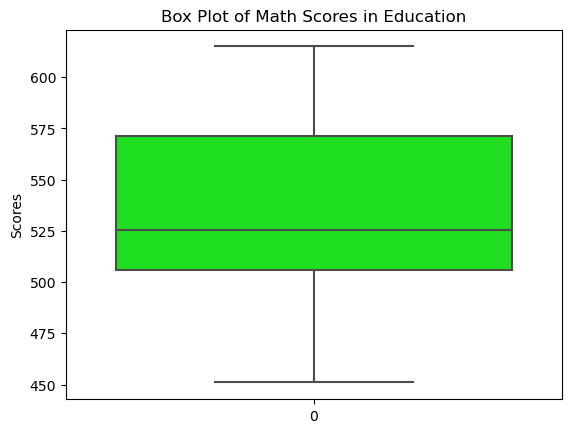

In [8]:
# A box plot is used to visualize central tendency, quartiles, and potential outlier data points. Using the education 
# dataset, I will plot a box plot of the math scores using Seaborn's boxplot() function. 

sns.boxplot(data = education['math'], color = 'lime')
plt.title('Box Plot of Math Scores in Education')
plt.ylabel('Scores')
plt.show()

## Visualization 3: Bullet Chart

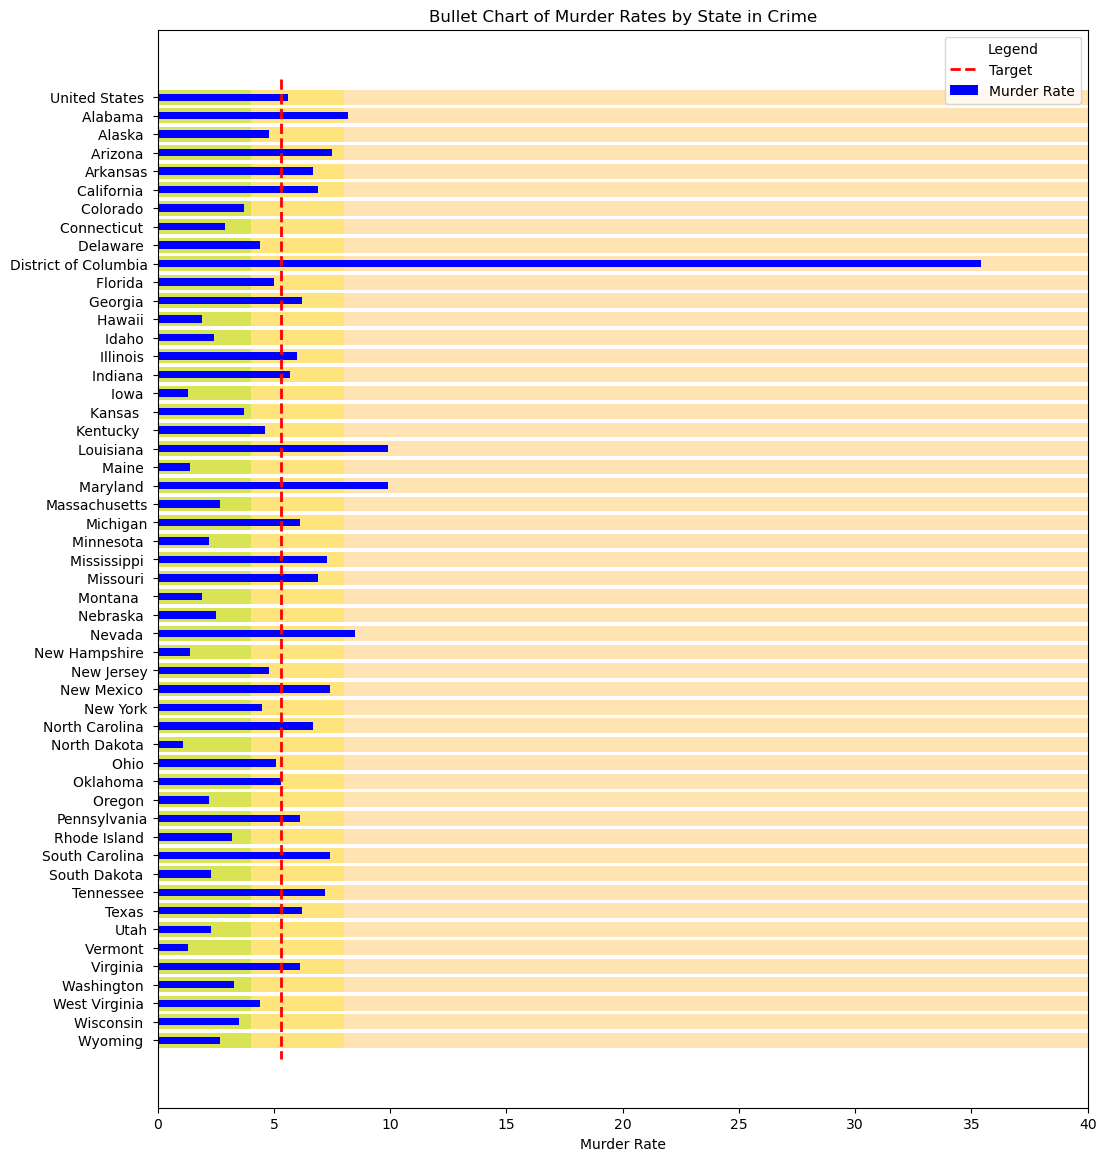

In [9]:
# To craft a bullet chart, I can use Matplotlib while utilizing a custom function that takes into account the parameters of 
# a bullet chart, which involves a range (low, medium, and high values that encompass the entirety of the variable's 
# observations), a target (a value that typically indicates the performance of the variable), and measures (the values in 
# the variable). 

# Before crafting the function, I need to define the target and range values needed for the bullet chart's creation. I have 
# chosen to use the crime dataset's 'murder' column for this visualization, so for the target value, I have taken the mean 
# of that variablele's observations. For the range values, a list of tuples is necessary to define the chart's low, medium, 
# and high values. After looking at the dataset, there is an outlier data point in this column (District of Columbia) with a
# value of 35.4. I have crafted the ranges to take this outlier under consideration. 

murder_target = crime['murder'].mean()
murder_ranges = [(0, 4), (4, 8), (8, 40)]

# Here the function is defined with four parameters: the crime dataset, the variable ('murder' in this case), the target 
# value, and the range values. To craft the bullet chart of the entire 'murder' variable, which consists of murder rates for
# all 50 states and the United States as a whole, I need to set an environment that allow the plotting of over 50 different
# bars of data. Using the plt.subplots(), np.arange() and len() functions, the visualization can be prepared for that amount
# of bars.

def plot_bullet_chart(crime, variable, target, ranges):
    fig, ax = plt.subplots(figsize = (12, 14))
    chart_size = np.arange(len(crime[variable]))

# I have defined the colors of the chart that are needed to properly visualize its scope: the range background bars, the 
# actual murder rates bars, and the target ticks that will show up on each measure bar. The range colors are placed in a 
# list matching the length of the range values so each tuple has a color associated with it.

    range_color = ['lime', 'yellow', 'orange']
    measure_color = 'blue'
    target_color = 'red'

# The below for loop constructs each background range bar as a horizontal bar chart using Matplotlib's barh() function and 
# places each chart within the same plane, allowing for the smooth output of one chart.

    for i, (low, high) in enumerate(ranges):
        ax.barh(chart_size, [high] * len(crime), color = range_color[i], edgecolor = 'none', height = 0.8, alpha = 0.3)

# I will now plot each murder rate bar on top of the established range bars, making sure that the range bars are still seen 
# by changing the height argument to be smaller than the height of the range bars in the previous chart creation. I
    
    ax.barh(chart_size, crime[variable], color = measure_color, edgecolor = 'none', height = 0.4, label = 'Murder Rate')

# The target line needs to be plotted next, which will be plotted using the vlines() function in Matplotlib. I have 
# specified the ymin and ymax arguments to ensure the line spans all of the bars. 
    
    ax.vlines(target, ymin = -1, ymax = len(crime), color = target_color, linewidth = 2, linestyle = '--', label = 'Target')

# Here is where I have customized the chart to make sure it outputs nicely. I have included the proper labels for each bar
# (I used invert_yaxis() to alphabetize all the states below the United States for a more aesthetically pleasing chart), 
# and set the limit of the x-axis to 40 to ensure I capture the entirety of the range bar values. I have created a legend 
# using get_handles_labels(), legend(), and set_title() to retrieve the label names from the previous plots and attached the
# legend name.

    ax.set_yticks(chart_size)
    ax.set_yticklabels(crime['state'])
    ax.invert_yaxis()  # Reverse the order of states
    ax.set_xlabel('Murder Rate')
    ax.set_title('Bullet Chart of Murder Rates by State in Crime')
    ax.set_xlim(0, 40)
    icons, labels = ax.get_legend_handles_labels()
    legend = ax.legend(icons, labels, loc = 'upper right')
    legend.set_title('Legend')
    plt.show()

# Calling the full function here allows me to craft the intended bullet chart with the crime dataset's 'murder' values.

plot_bullet_chart(crime, 'murder', murder_target, murder_ranges)


## Visualization 4: Stacked Line Chart

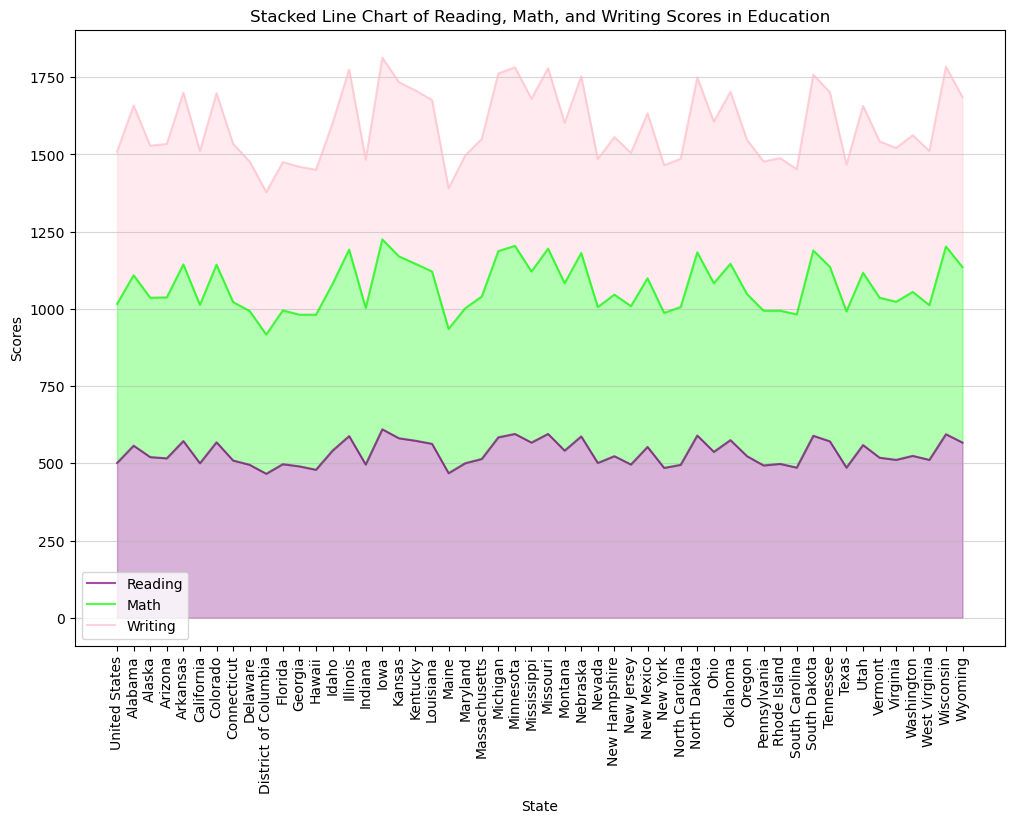

In [15]:
# For my additional chart, I will create a stakced line chart that will stack writing and math scores in the Education 
# dataset on top of the reading scores. In order for me to best do this, I will create new columns in the dataset that add
# the scores together in a way that each line chart plotted will be stacked on top of one another. 

education['stack_reading'] = education['reading']
education['stack_math'] = education['math'] + education['stack_reading']
education['stack_writing'] = education['writing'] + education['stack_math']

plt.figure(figsize = (12,8))

# To plot the line charts, I will use the plot() function from Matplotlib. 

plt.plot(education['state'], education['stack_reading'], label = 'Reading', color = 'purple', alpha = 0.7)
plt.plot(education['state'], education['stack_math'], label = 'Math', color = 'lime', alpha = 0.7)
plt.plot(education['state'], education['stack_writing'], label = 'Writing', color = 'pink', alpha = 0.7)

# To create the shaded areas underneath the line charts, the fill_between() function can be used here. 

plt.fill_between(education['state'], education['stack_reading'], color = 'purple', alpha = 0.3)
plt.fill_between(education['state'], education['stack_reading'], education['stack_math'], color = 'lime', alpha = 0.3)
plt.fill_between(education['state'], education['stack_math'], education['cumulative_writing'], color = 'pink', alpha = 0.3)

# For better readability, I have added a legend, rotated the state labels, and added gridlines for the y-axis.

plt.title('Stacked Line Chart of Reading, Math, and Writing Scores in Education')
plt.xlabel('State')
plt.ylabel('Scores')
plt.xticks(rotation = 90)
plt.legend()
plt.grid(axis = 'y', alpha = 0.5)

plt.show()